In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings as wn
wn.filterwarnings("ignore")

In [2]:
df=pd.read_csv("datasets_11167_15520_train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Business case 

* Given dataset has various features that helps to classify the price range of mobile which one sell more in market
* Why it is done ?

# Domain Analysis

# Basic checks

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
for i in df: #There is no objects in this cellphone dataset function
    if df[i].dtype == "O":
        print(i) 

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

                                             |                                             | [  0%]   00:00 ->…


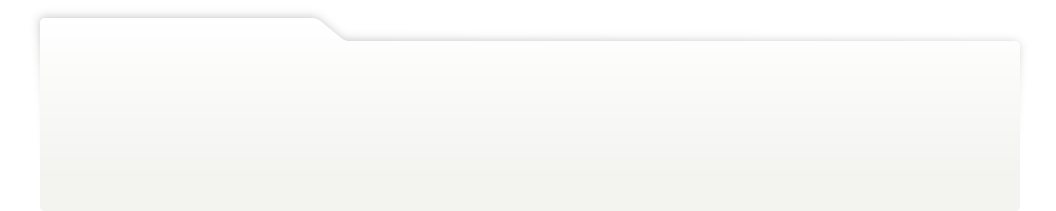
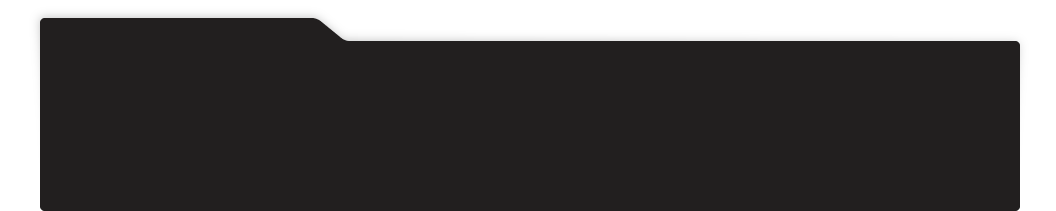
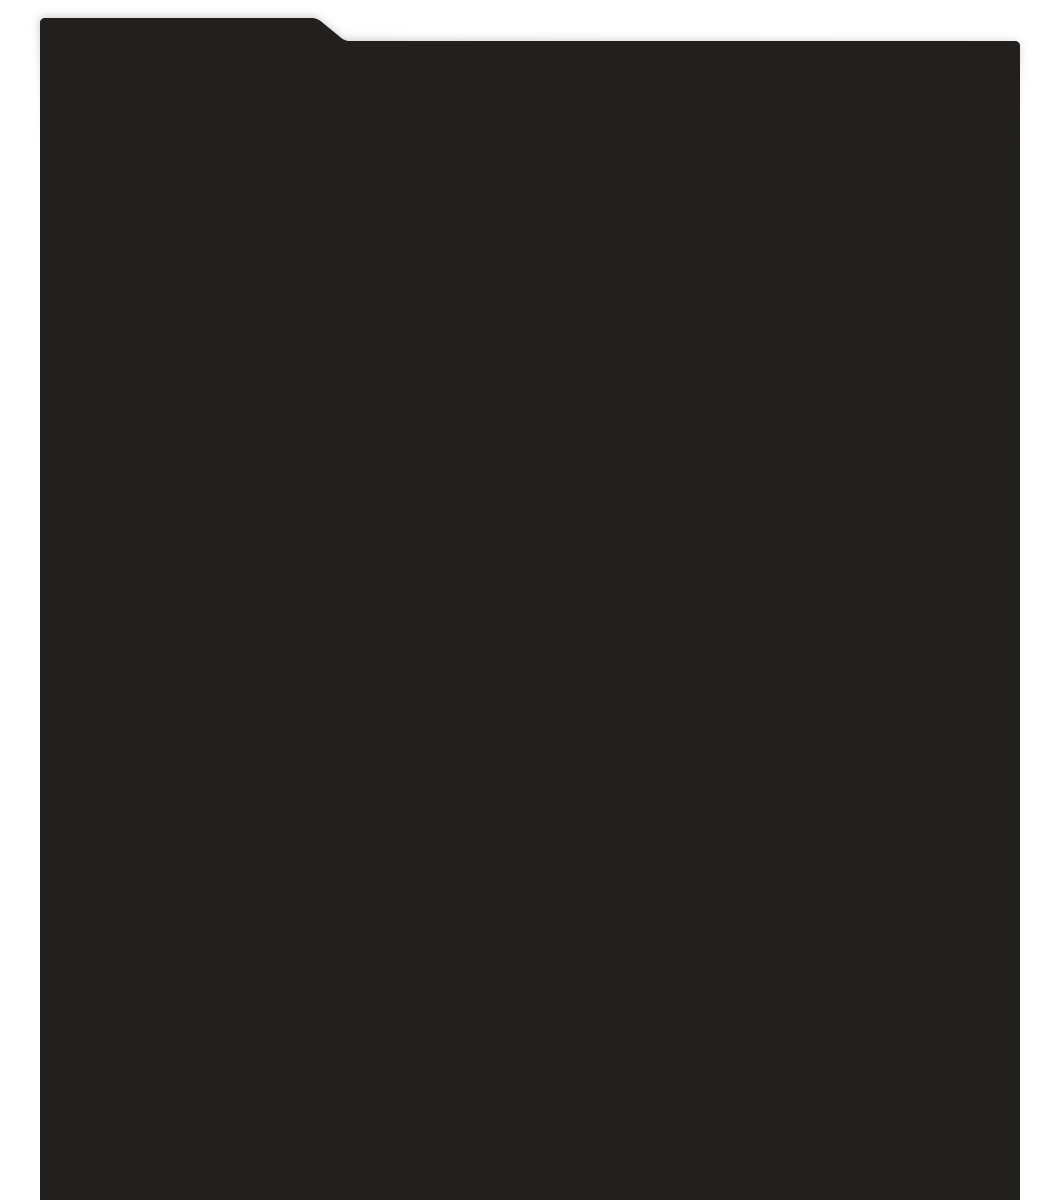
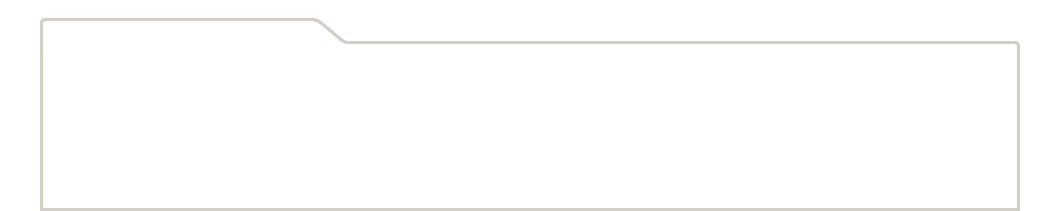
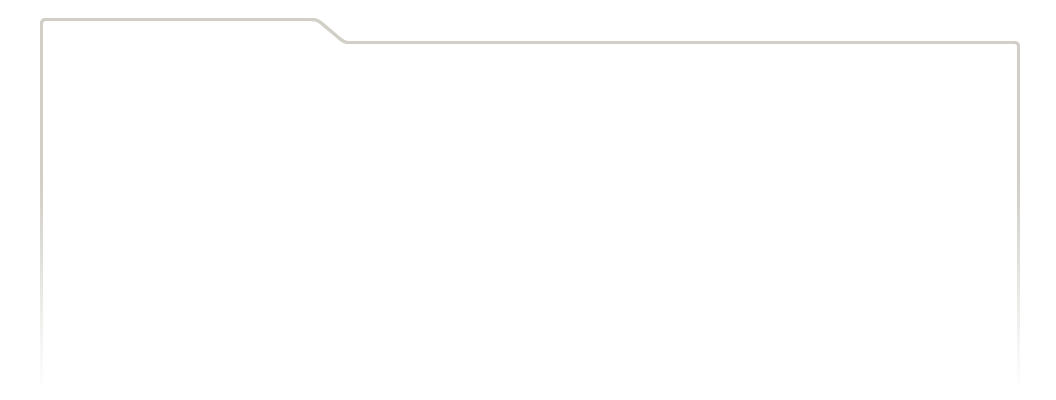
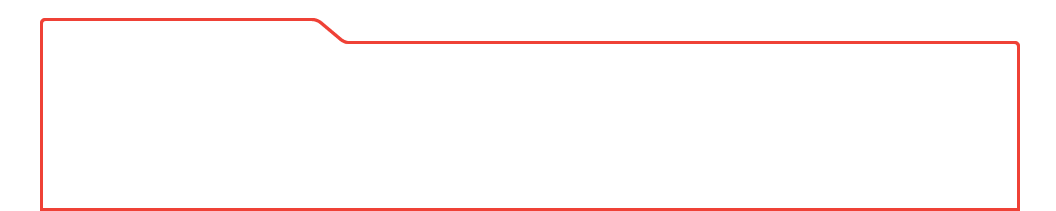
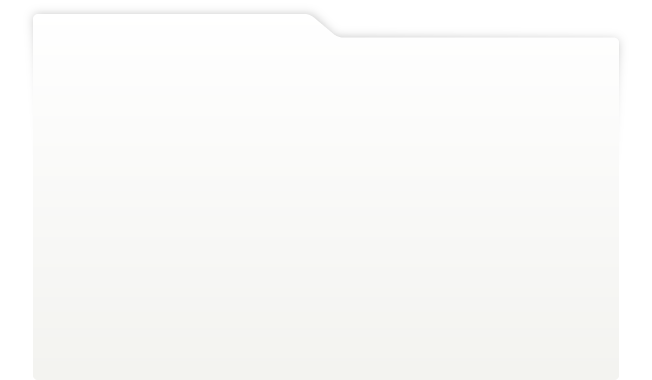
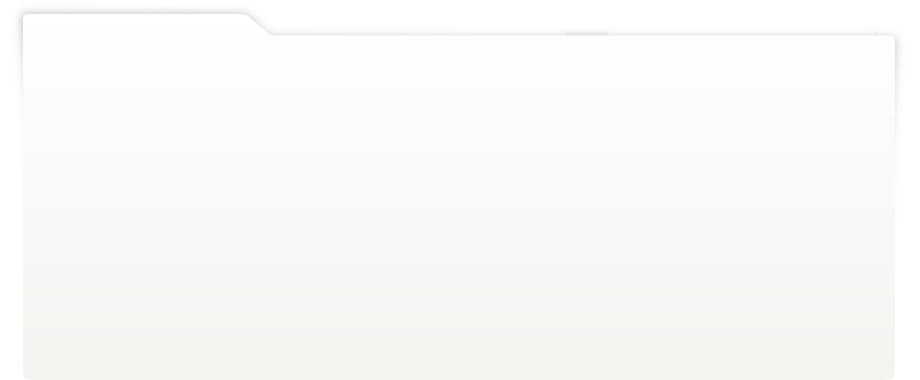
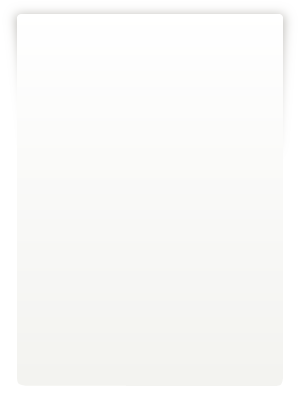
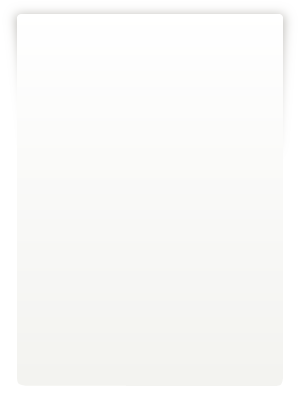
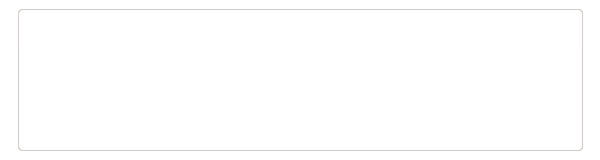
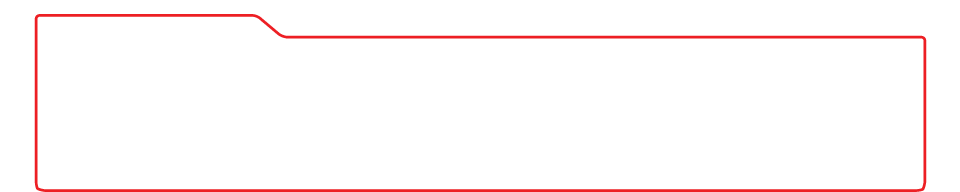
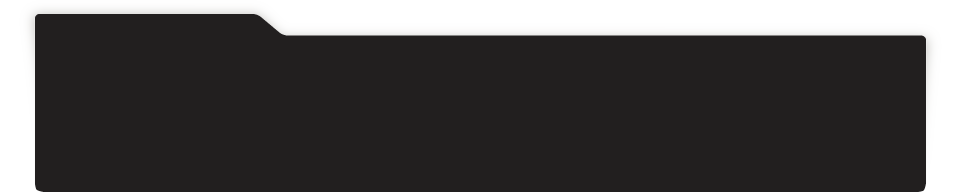
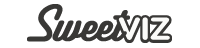
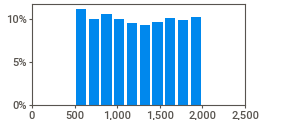
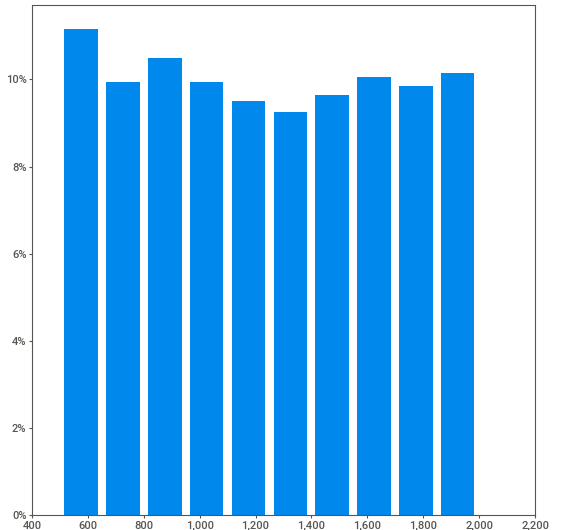
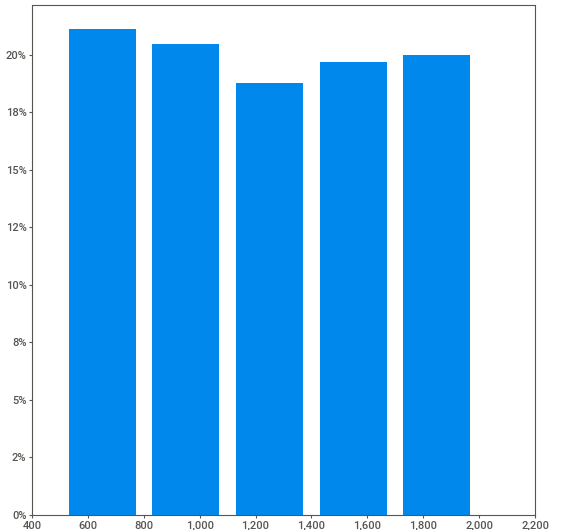
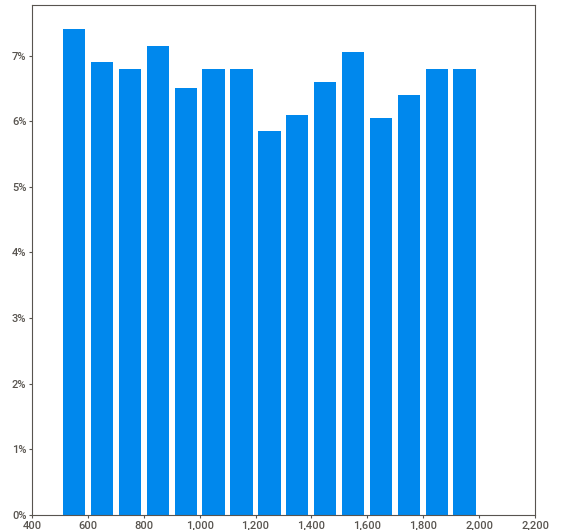
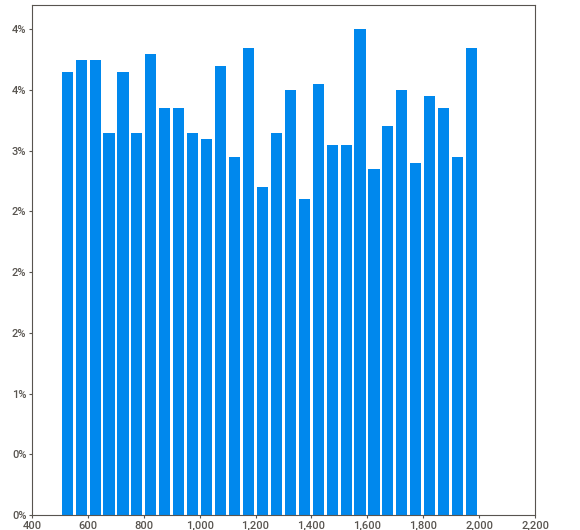
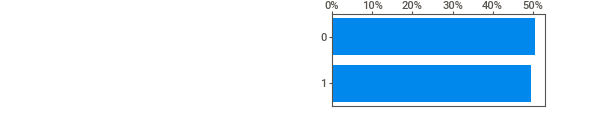
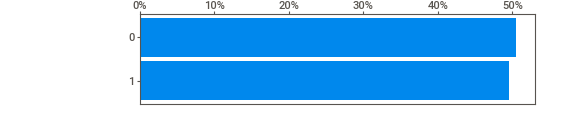
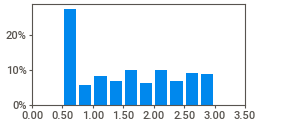
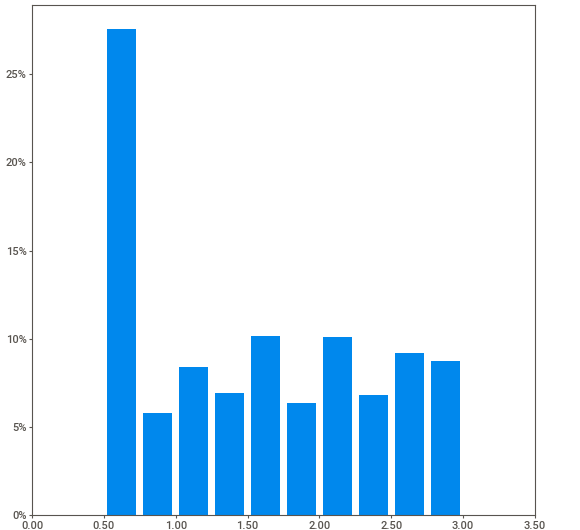
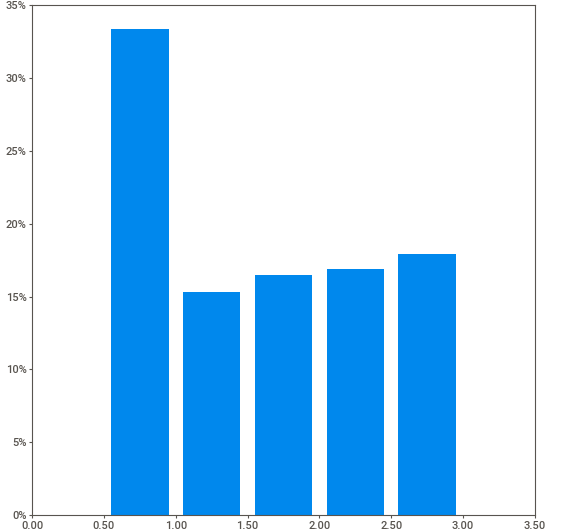
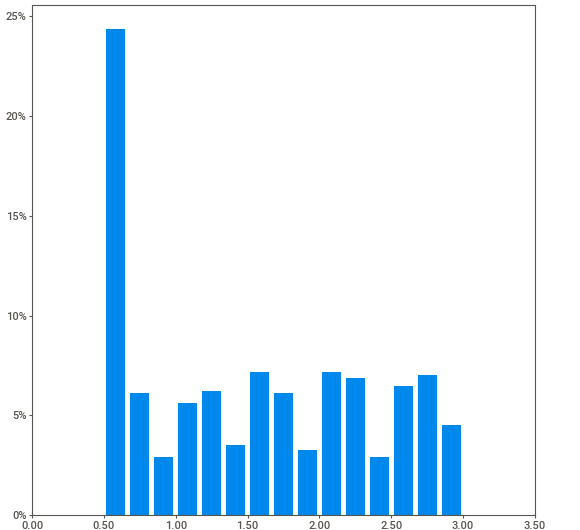
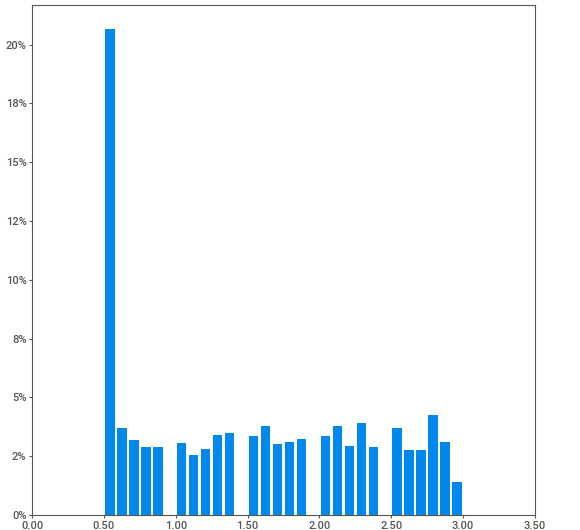
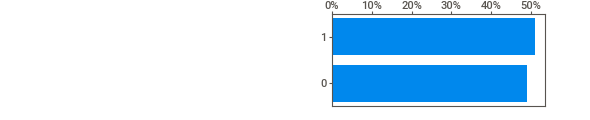
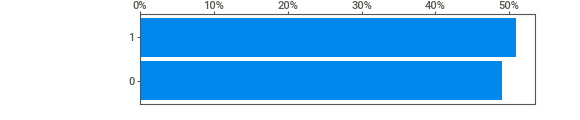
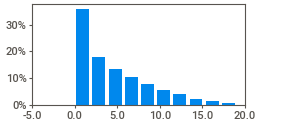
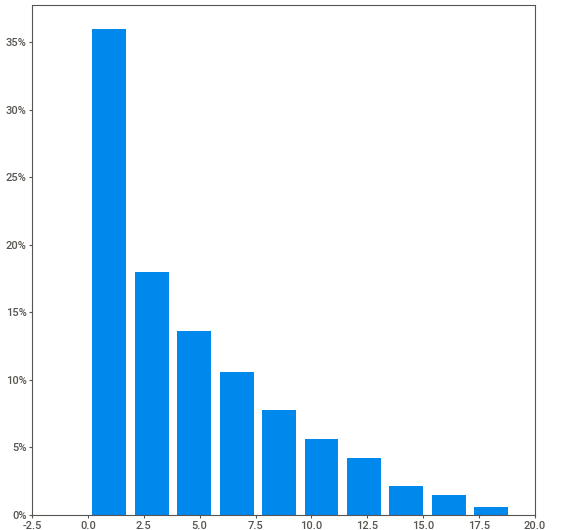
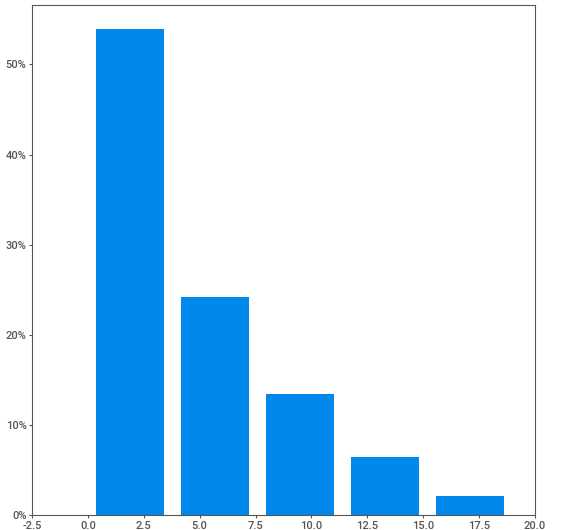
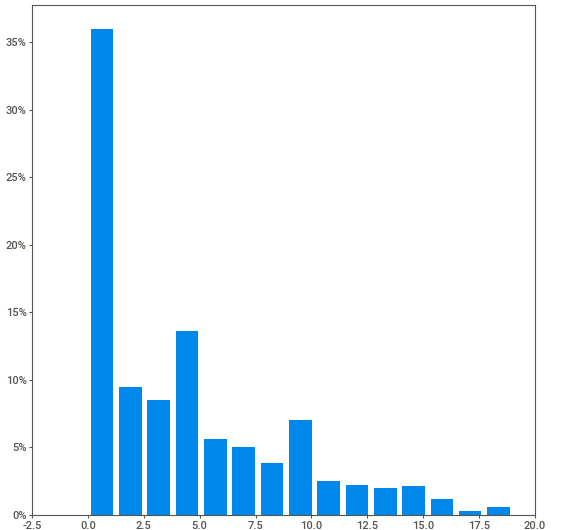
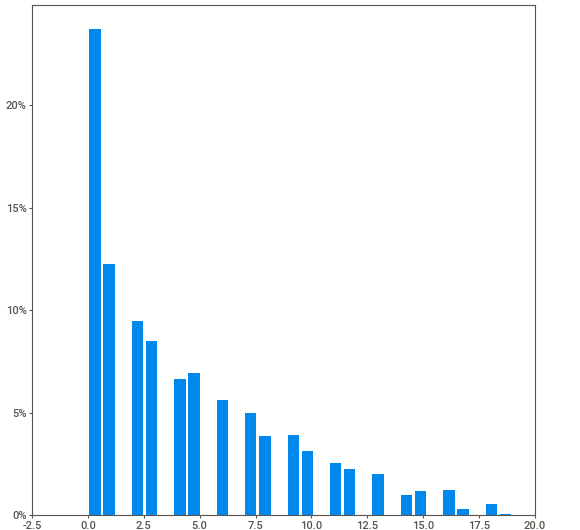
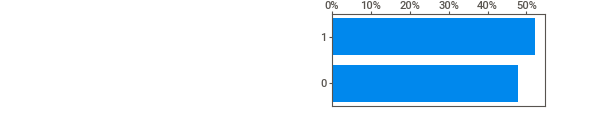
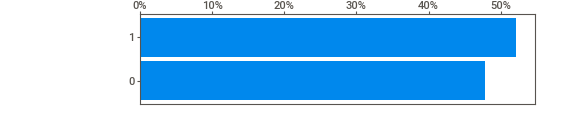
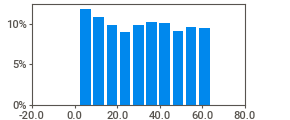
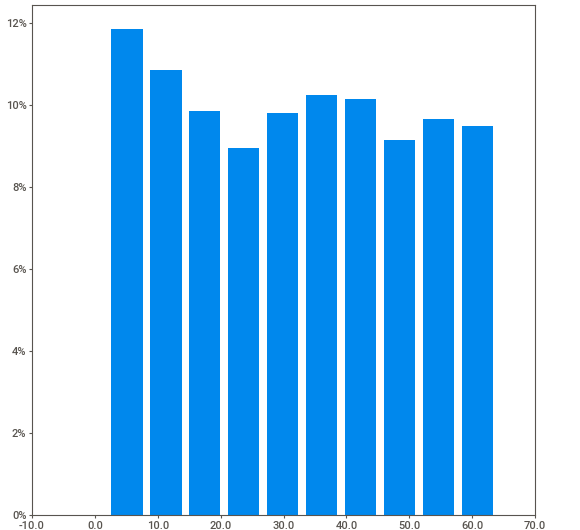
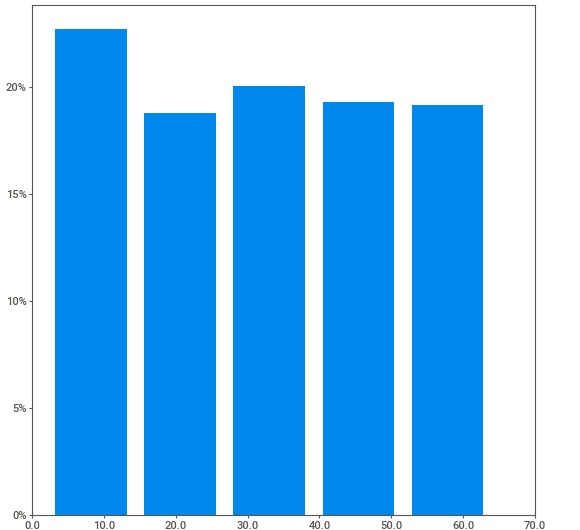
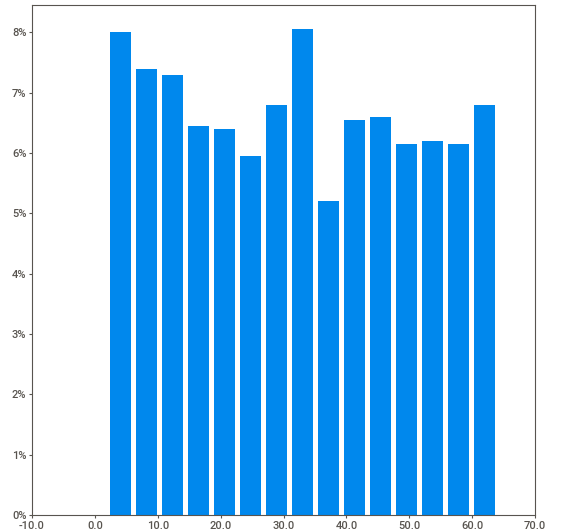
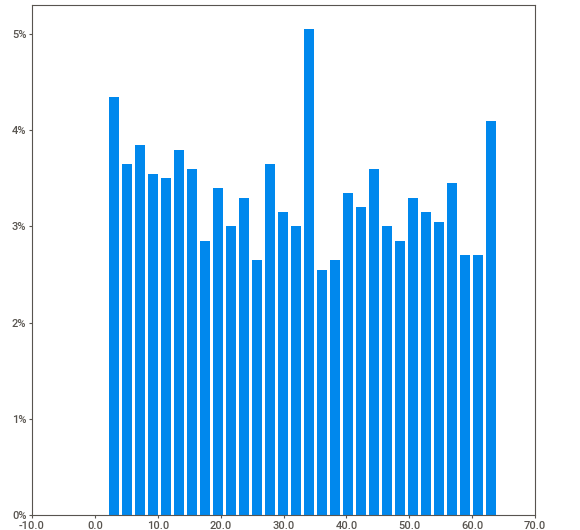
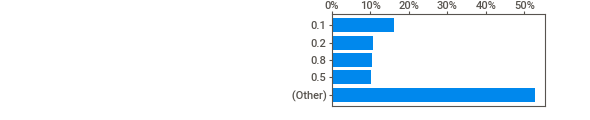
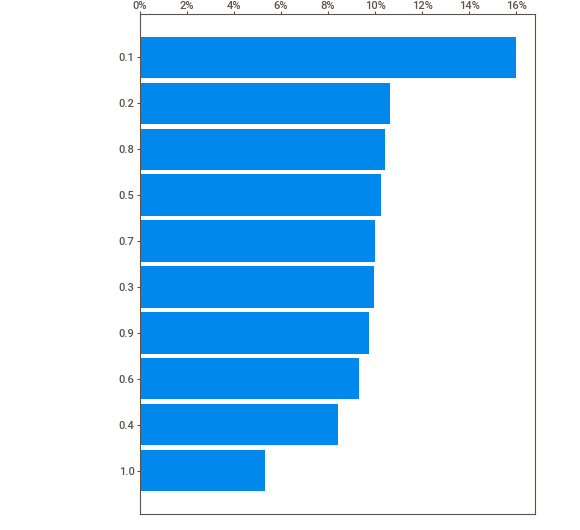
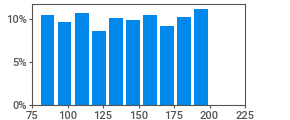
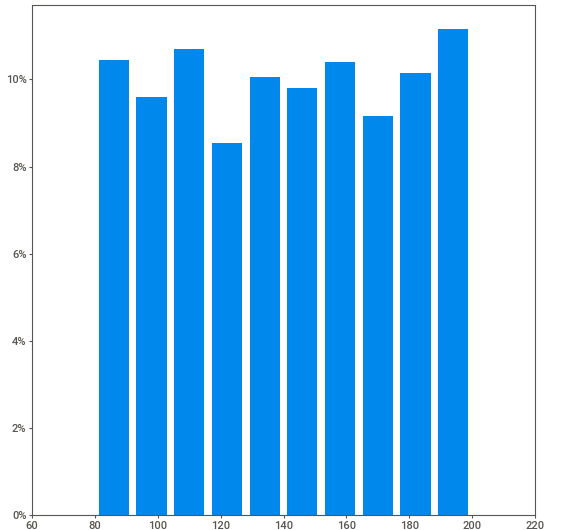
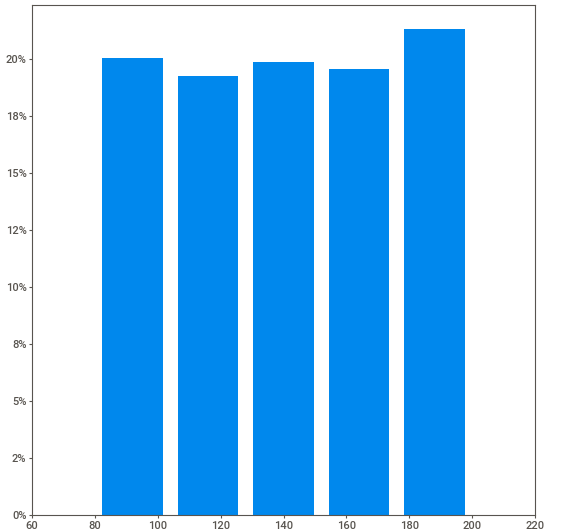
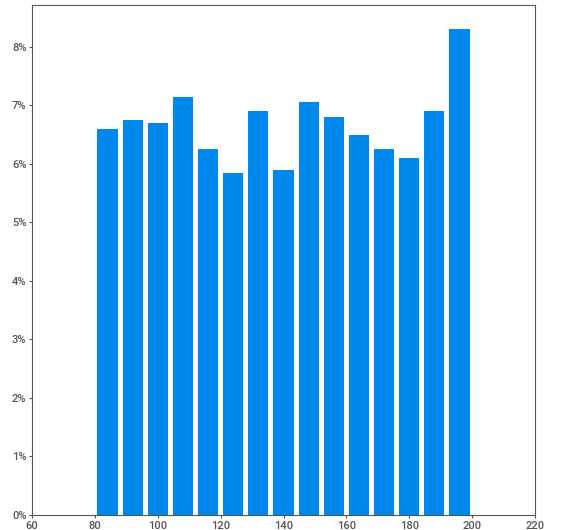
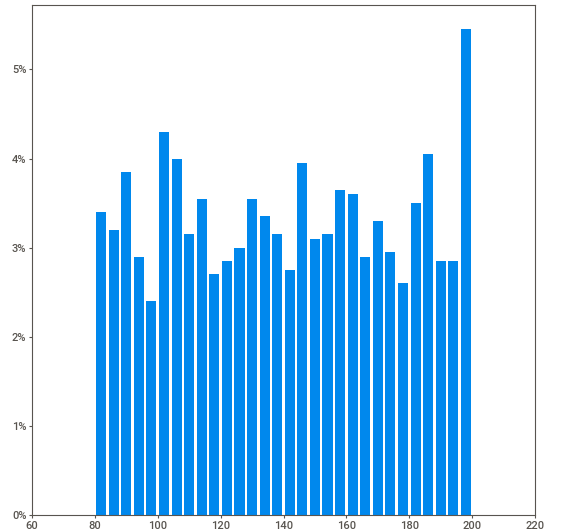
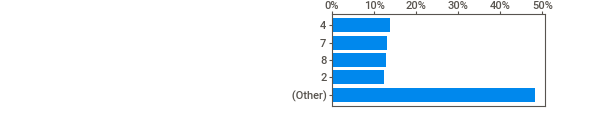
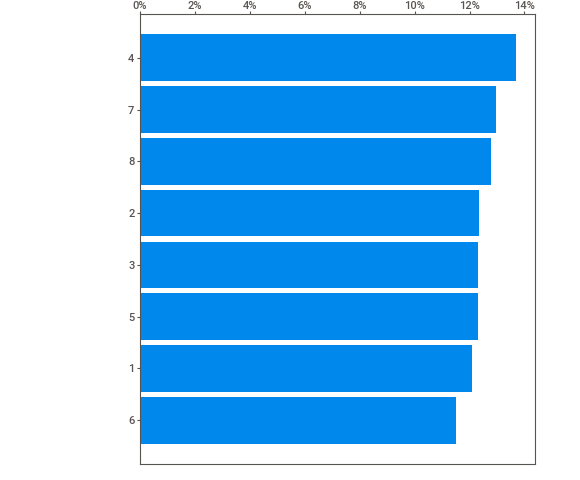
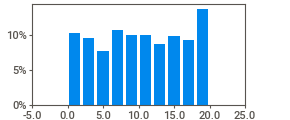
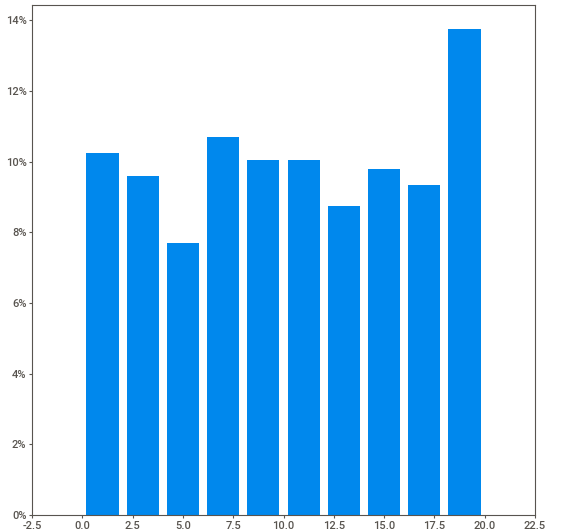
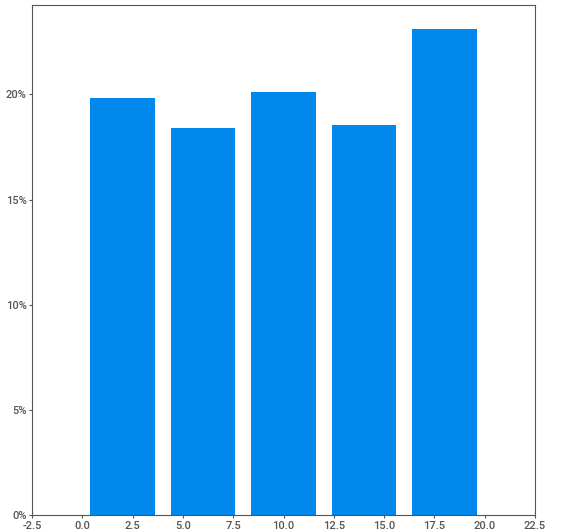
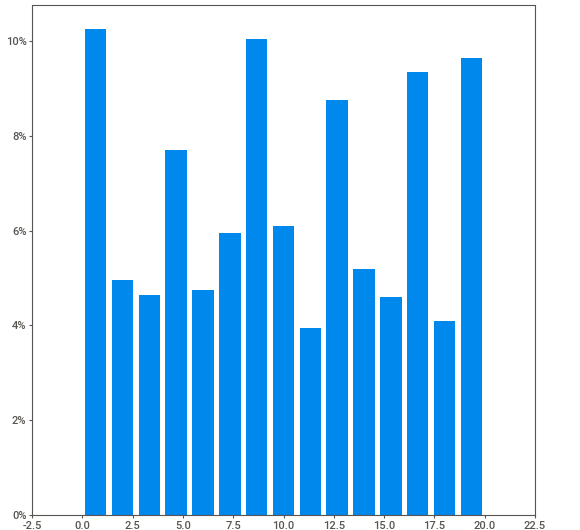
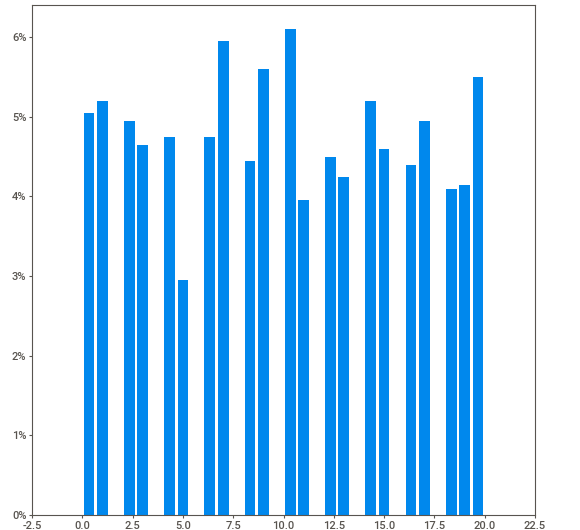
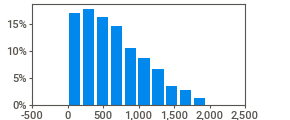
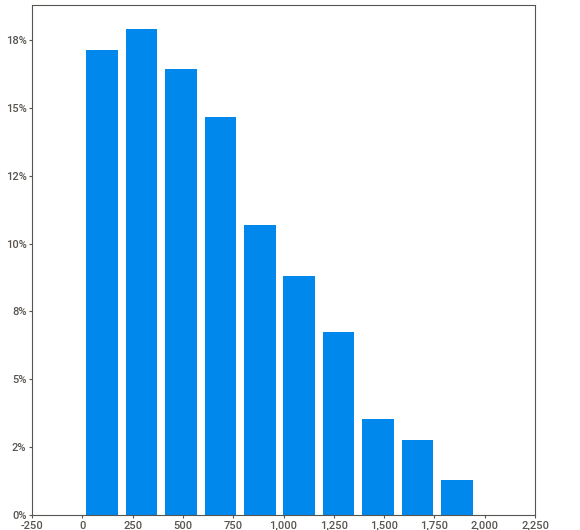
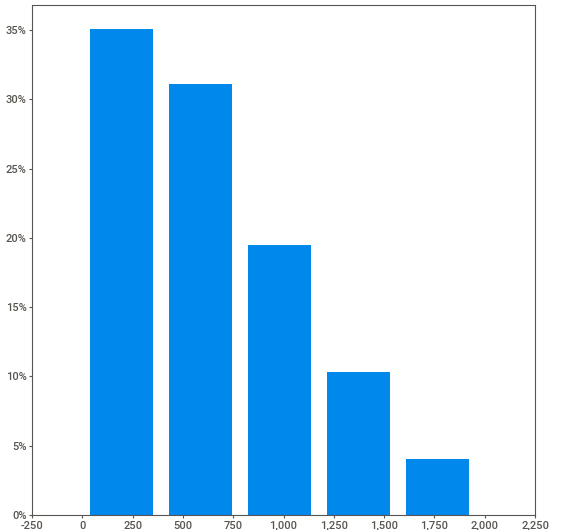
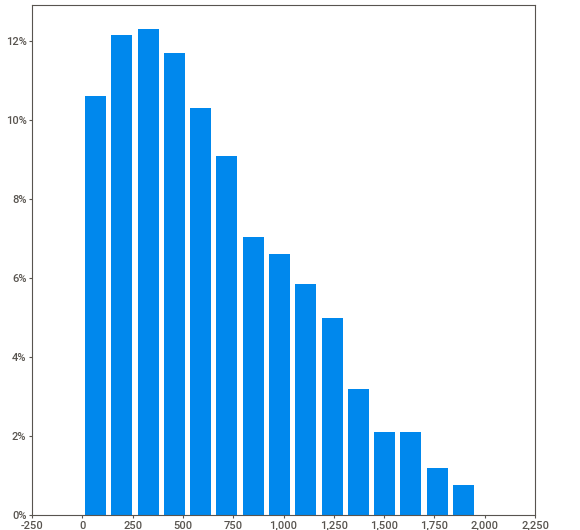
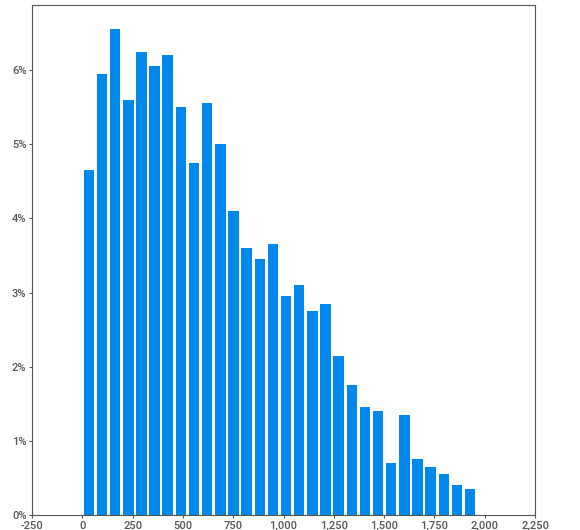
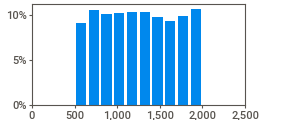
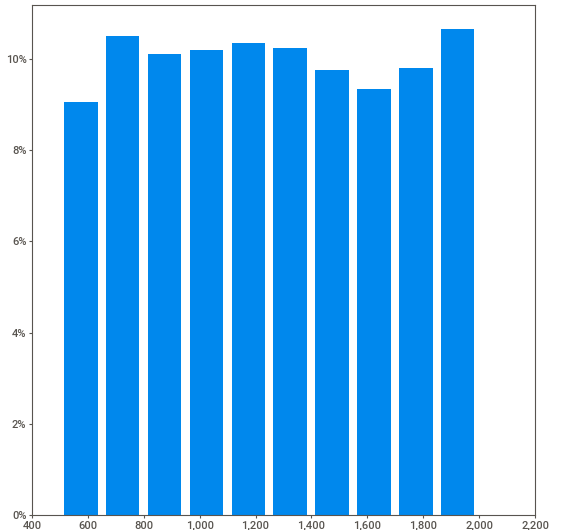
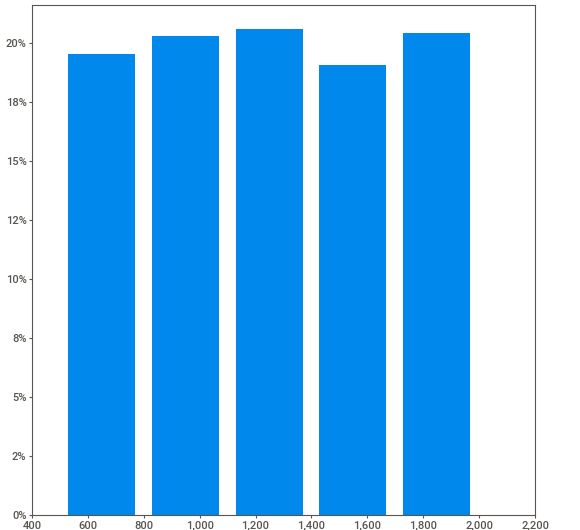
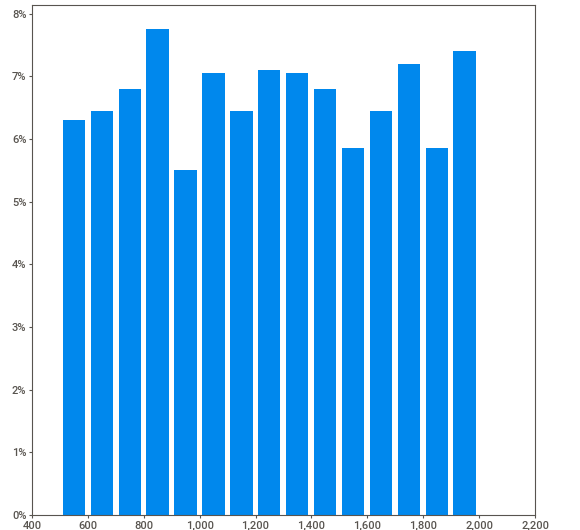
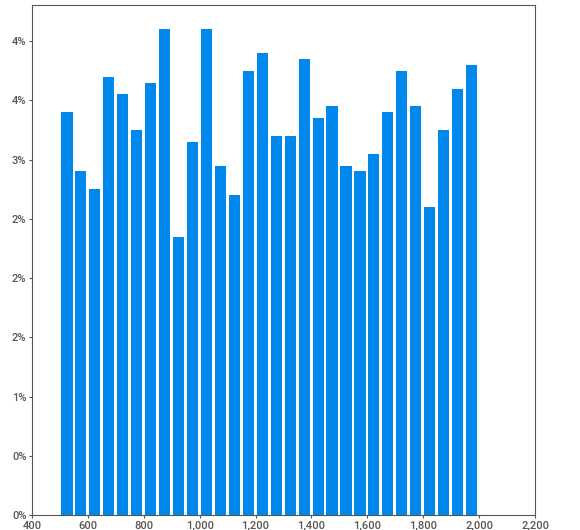
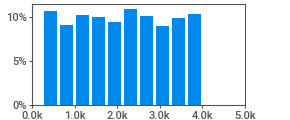
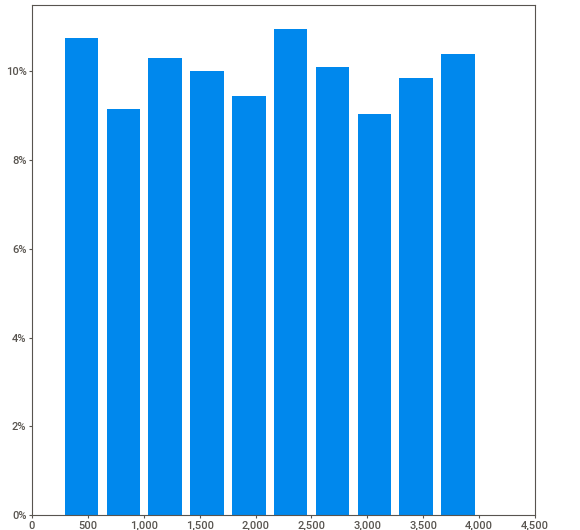
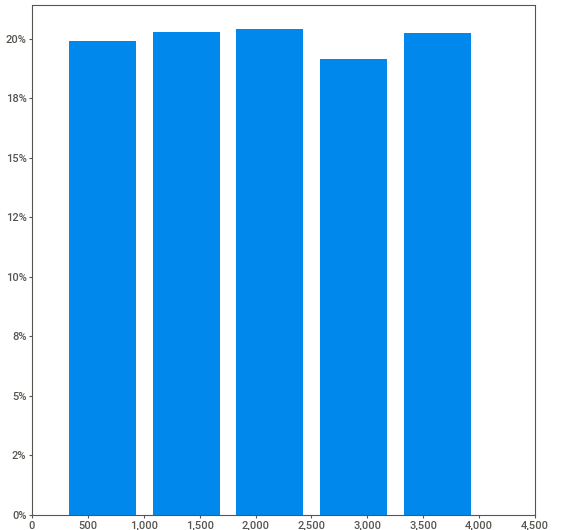
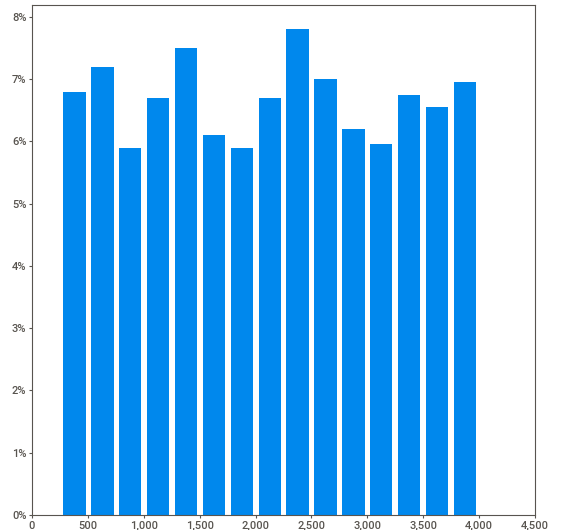
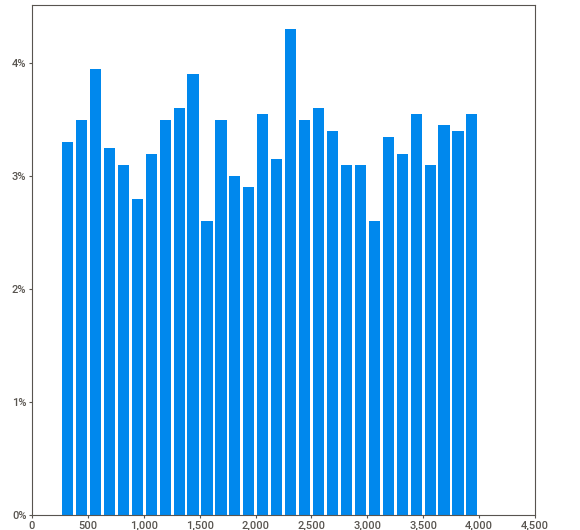
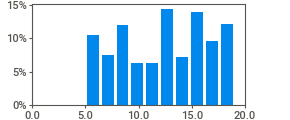
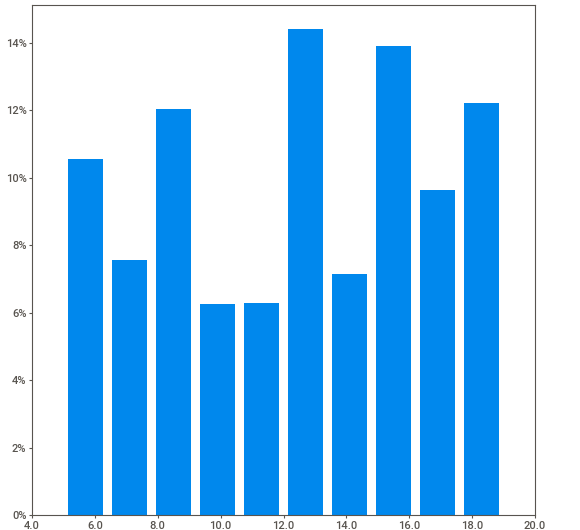
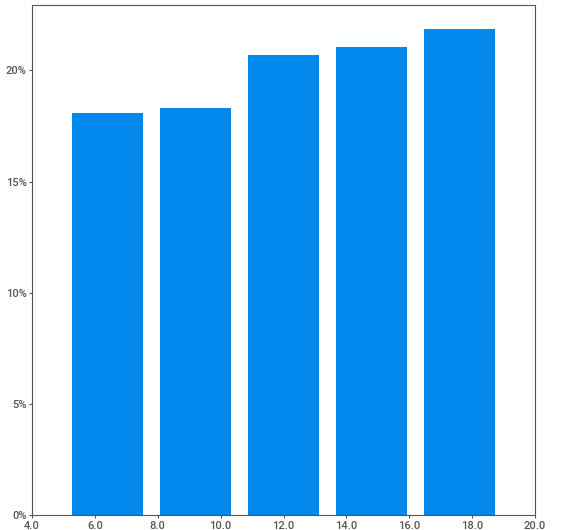
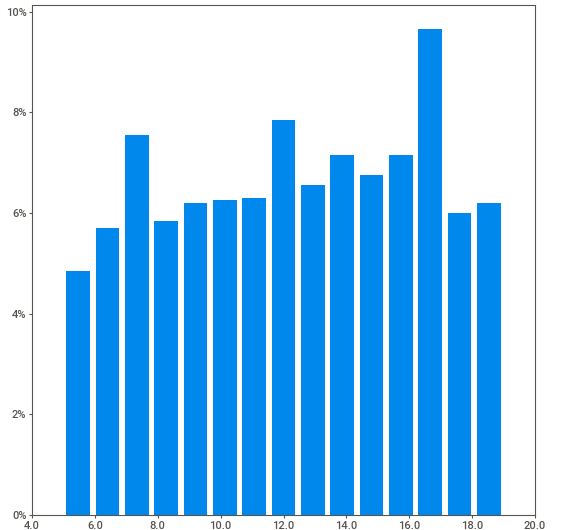
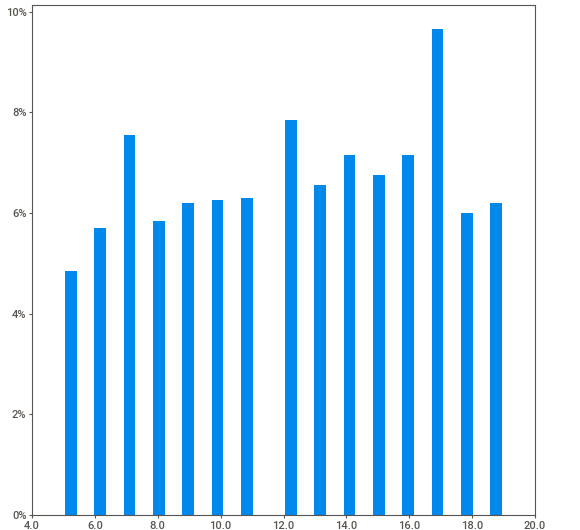
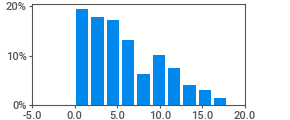
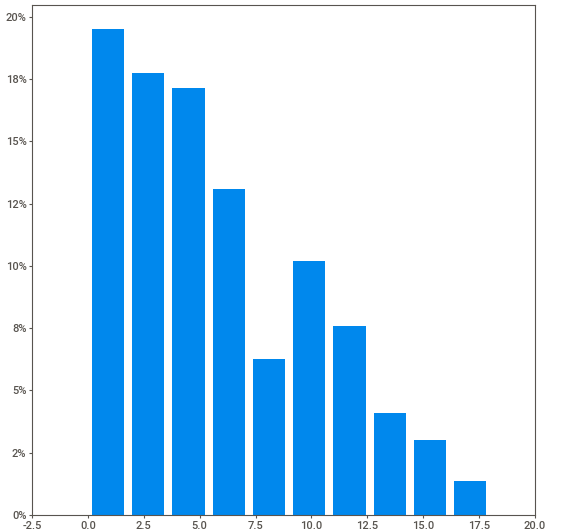
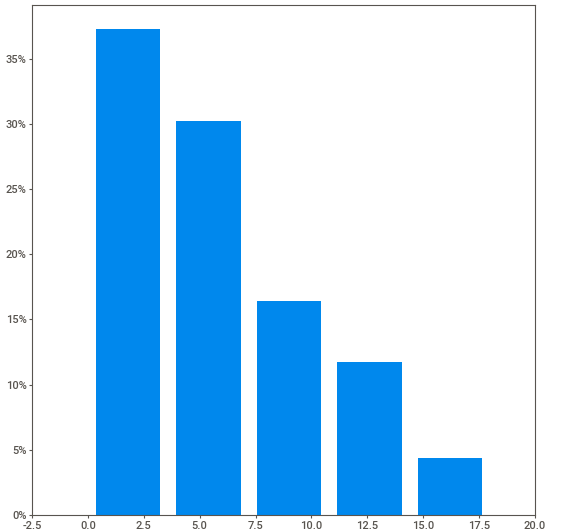
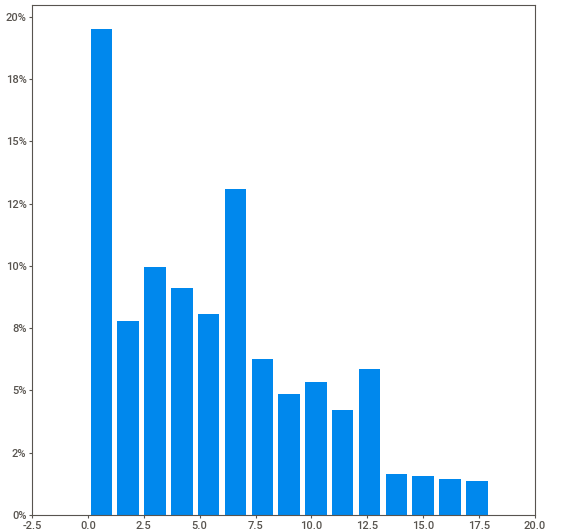
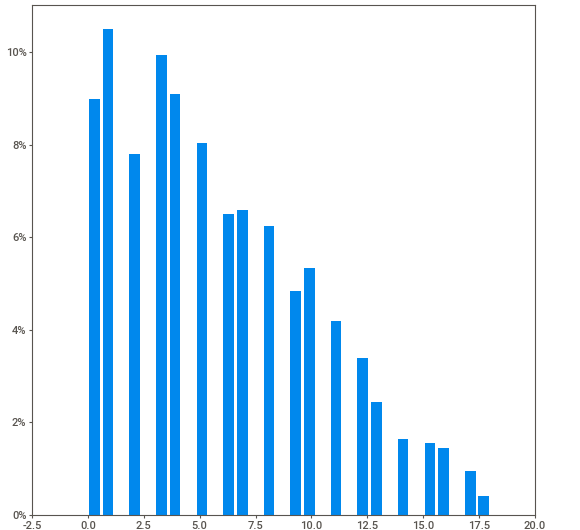
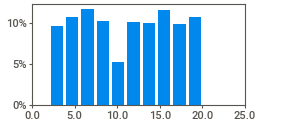
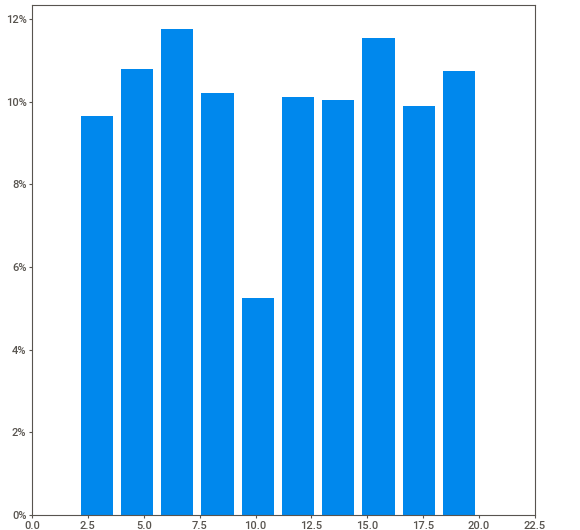
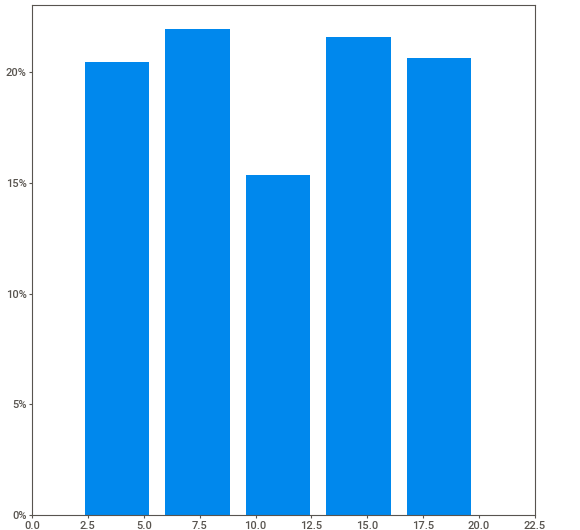
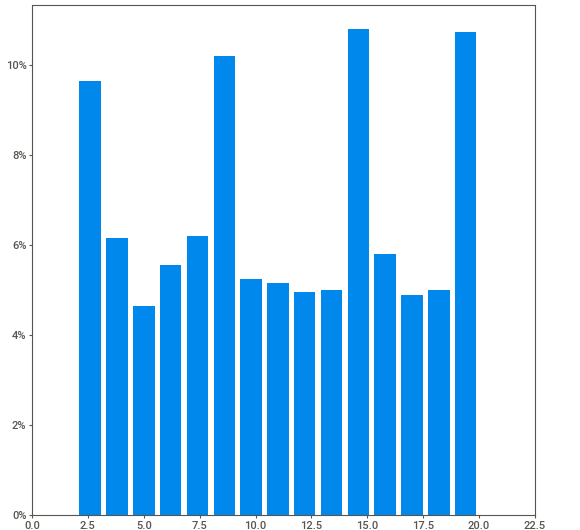
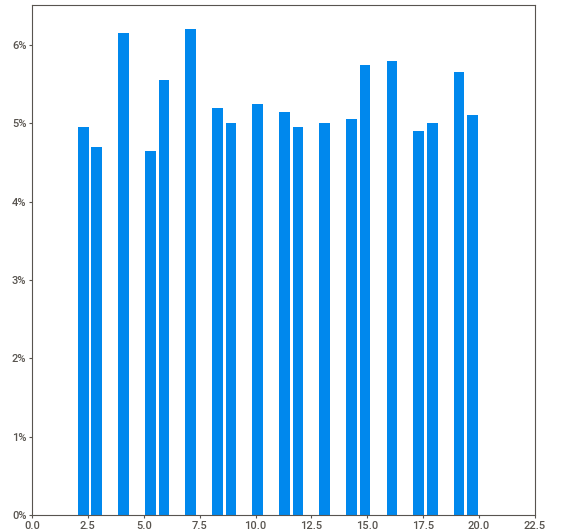
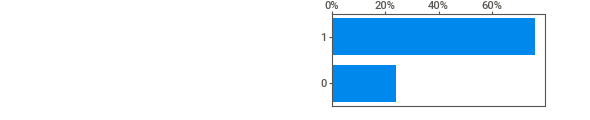
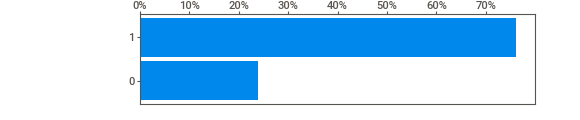
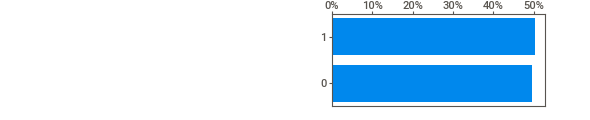
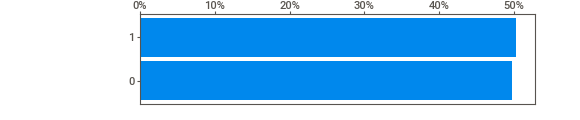
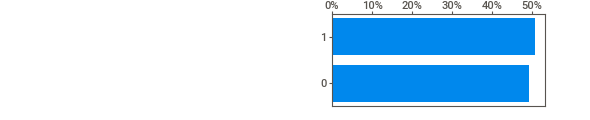
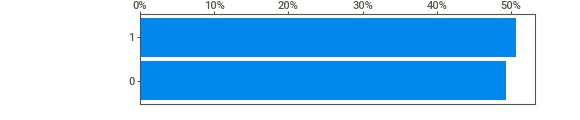
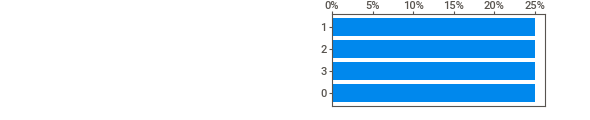
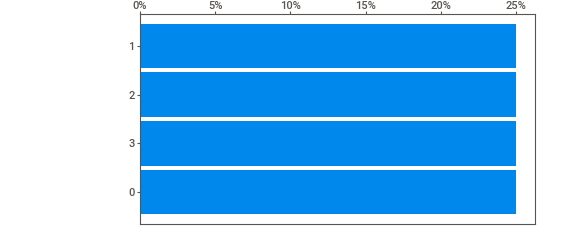
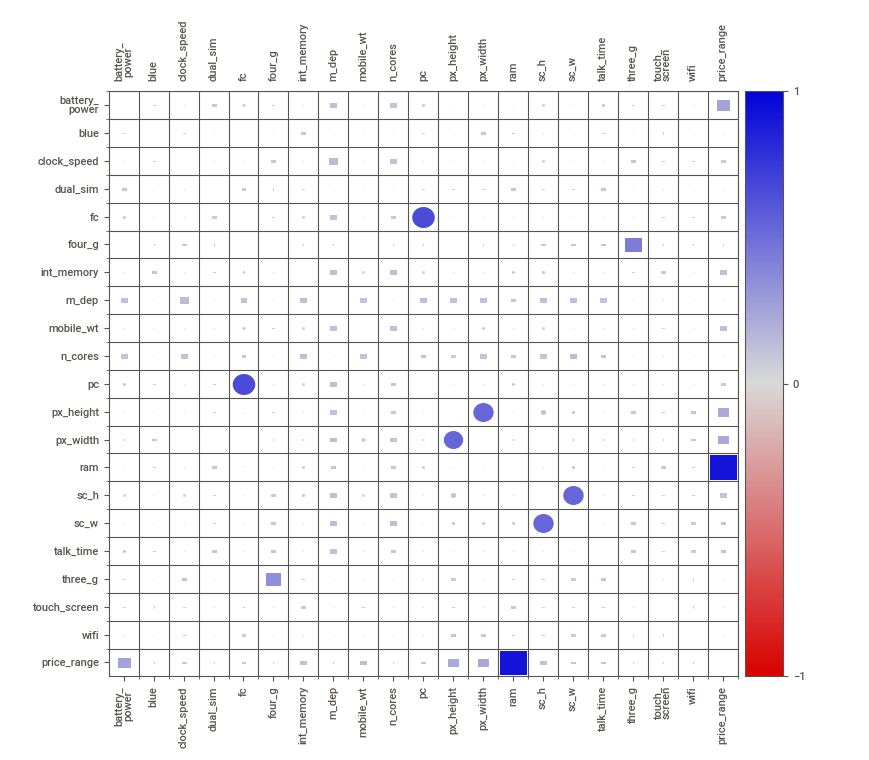
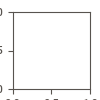

In [10]:
import sweetviz as sv
report = sv.analyze(df)
report.show_notebook()

In [11]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Basic checks insights


    

In [12]:
#There is no null values in the cellphone dataset
#There is no objects in this cellphone dataset function

# EDA

<Axes: xlabel='price_range', ylabel='Density'>

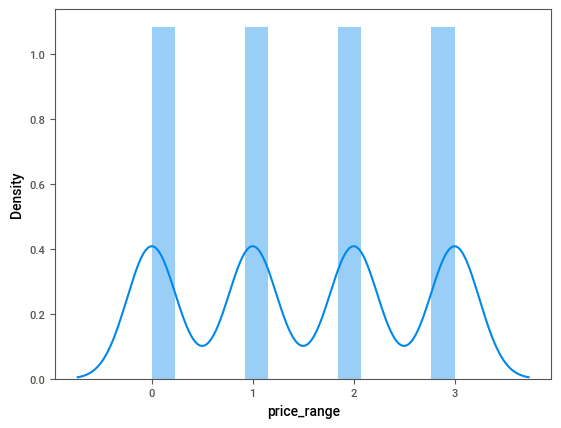

In [13]:
sns.distplot(df["price_range"],kde=True)

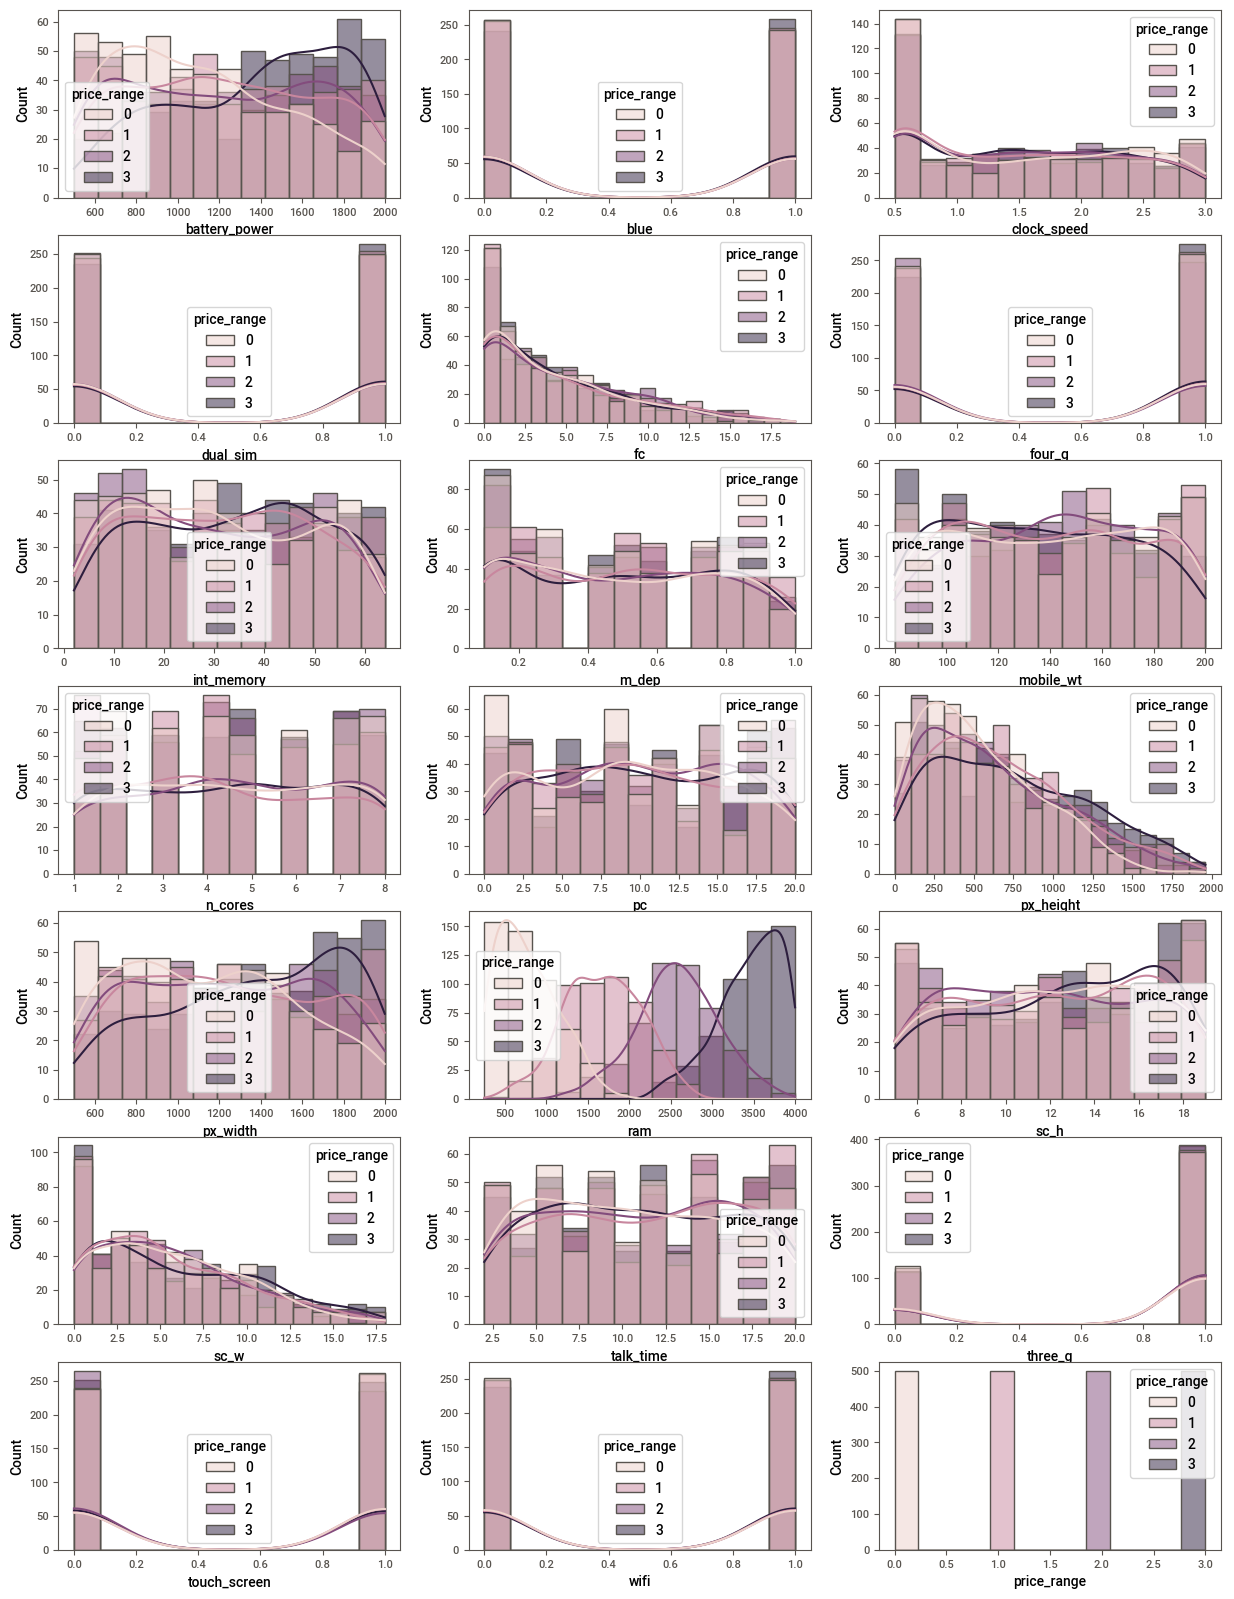

In [14]:
plt.figure(figsize=(15,20)) #width and height
plotnumber=1

for i in df:
    plt.subplot(7,3,plotnumber)
    sns.histplot(x=i, data=df, kde=True,hue="price_range")
    plotnumber+=1 
    

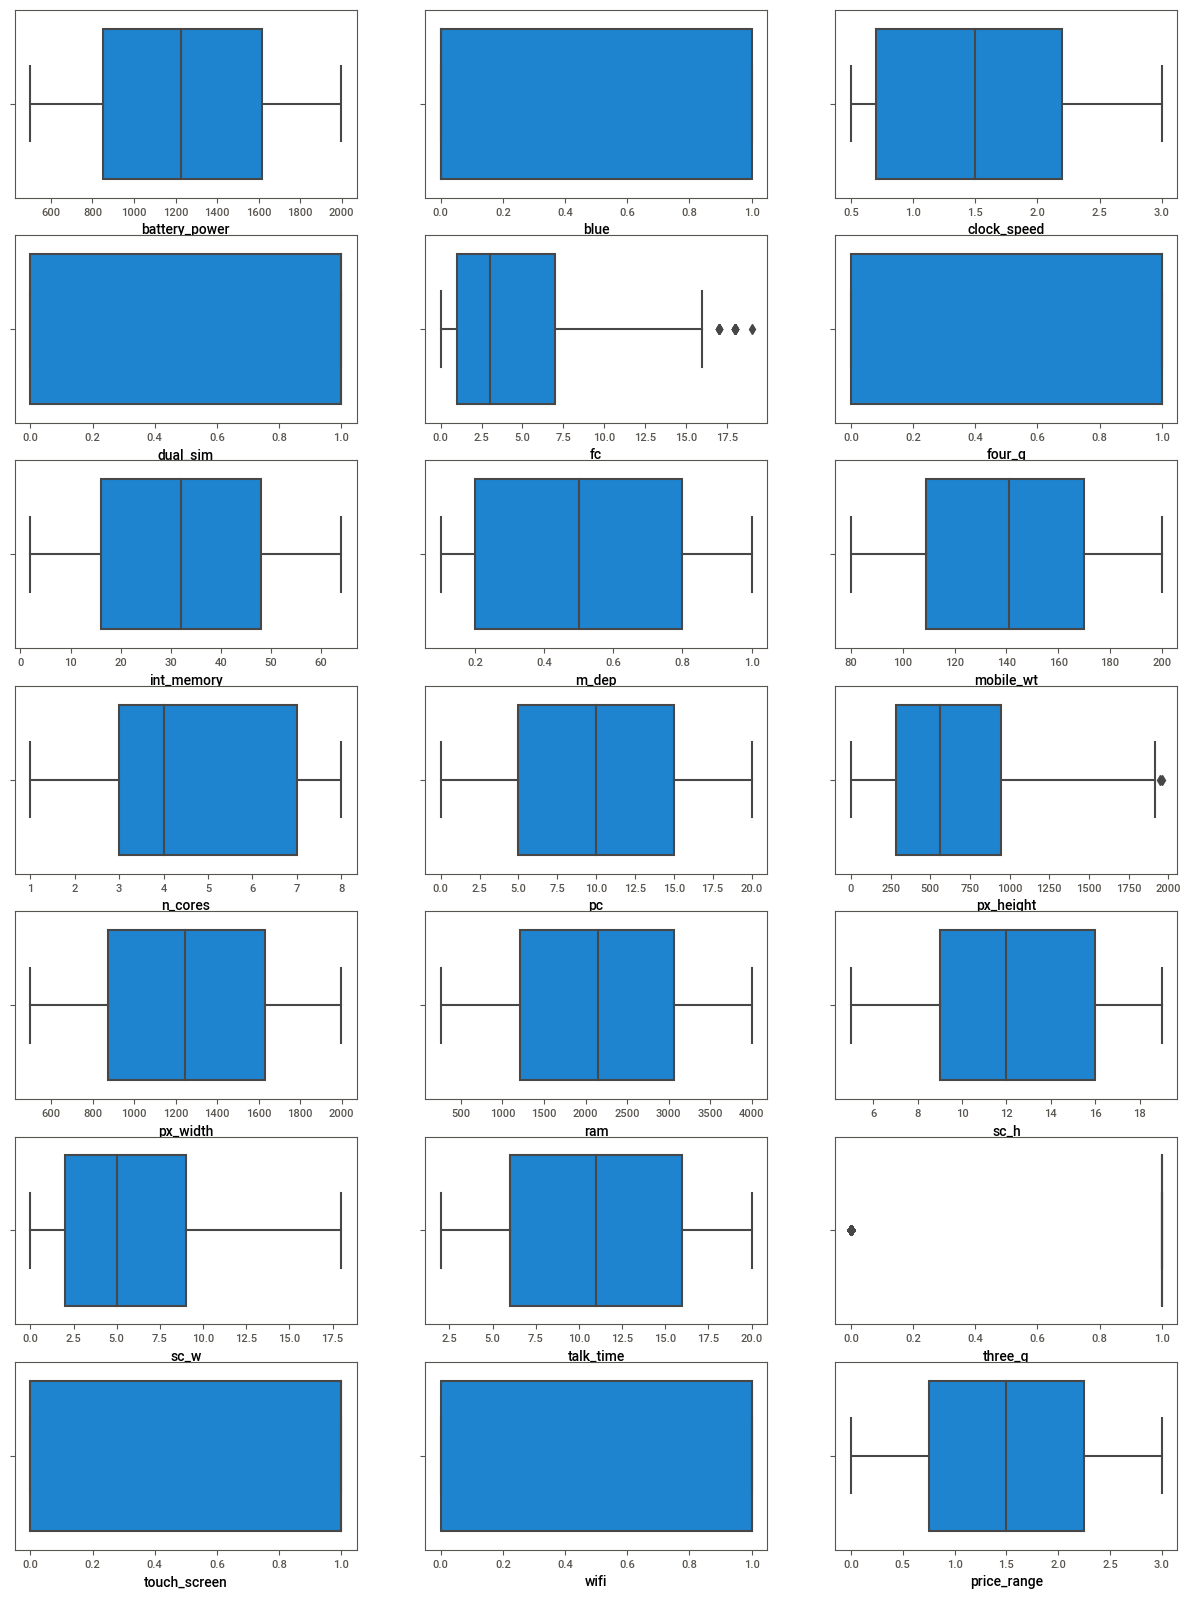

In [15]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in df:
    plt.subplot(7,3,plotnumber)
    sns.boxplot(x=i,data=df)
    plotnumber+=1

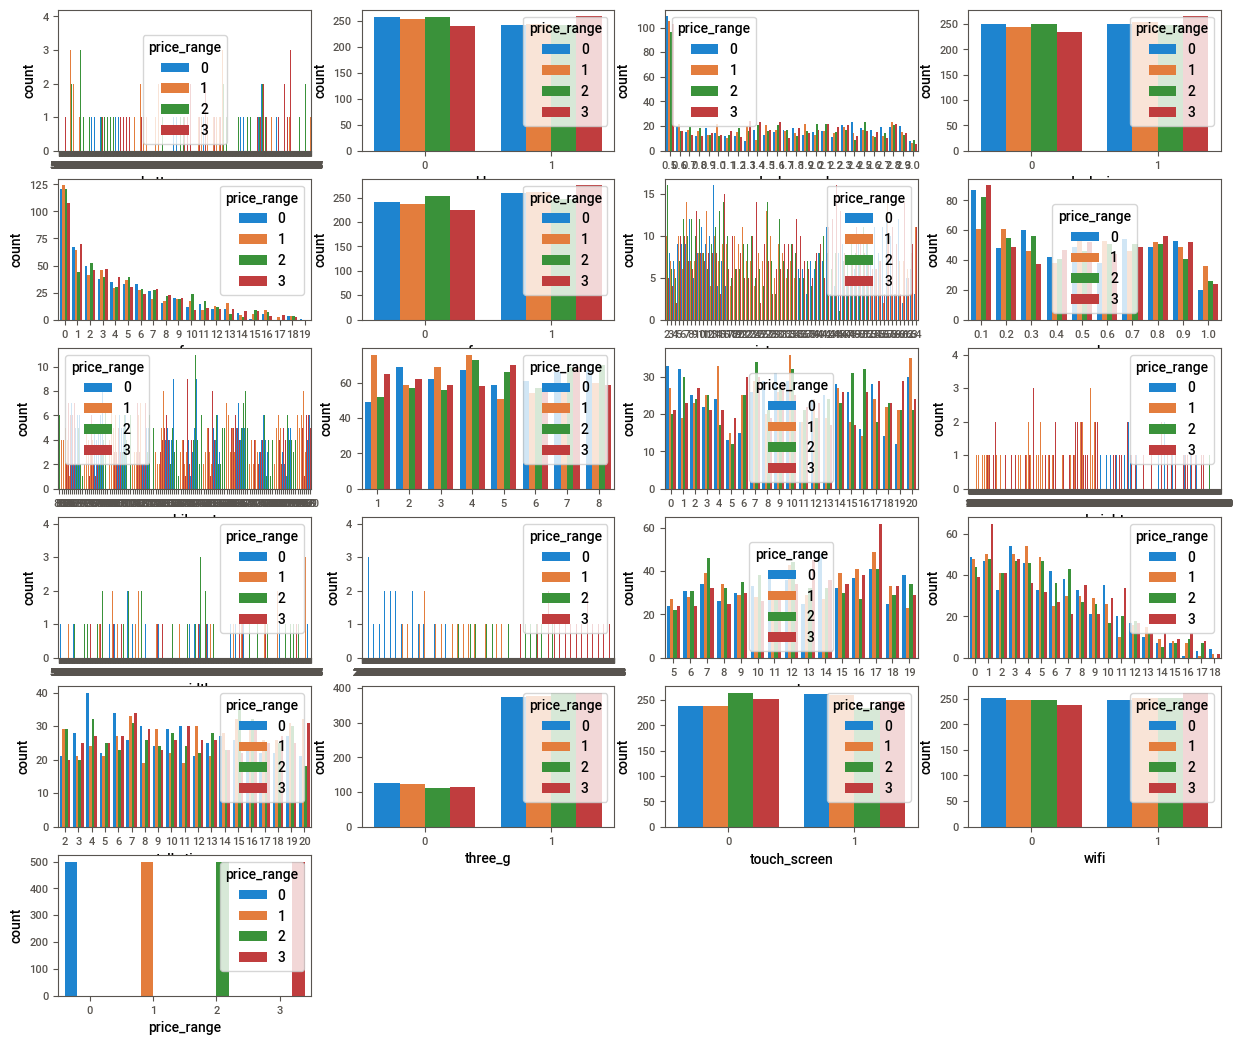

In [16]:
plt.figure(figsize=(15,15))
pltno=1
for i in df:
    plt.subplot(7,4,pltno)
    sns.countplot(x=i,data=df, hue="price_range")
    pltno+=1

<Axes: xlabel='three_g', ylabel='ram'>

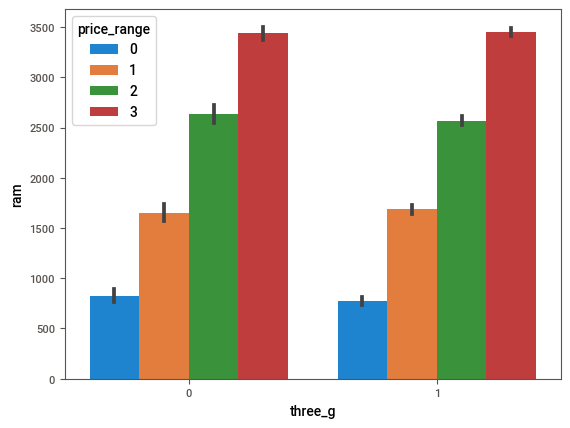

In [17]:
sns.barplot(x="three_g", y = "ram",data=df, hue="price_range")

In [ ]:
sns.pairplot(data=df,hue="price_range")

# Data preprocessing

In [18]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df[["fc","px_height","three_g"]]=\
mms.fit_transform(df[["fc","px_height","three_g"]])

In [19]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,0.052632,0,7,0.6,188,2,...,0.010204,756,2549,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0.000000,1,53,0.7,136,3,...,0.461735,1988,2631,17,3,7,1.0,1,0,2
2,563,1,0.5,1,0.105263,1,41,0.9,145,5,...,0.644388,1716,2603,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0.000000,0,10,0.8,131,6,...,0.620408,1786,2769,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,0.684211,1,44,0.6,141,2,...,0.616327,1212,1411,8,2,15,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.000000,1,2,0.8,106,6,...,0.623469,1890,668,13,4,19,1.0,1,0,0
1996,1965,1,2.6,1,0.000000,0,39,0.2,187,4,...,0.466837,1965,2032,11,10,16,1.0,1,1,2
1997,1911,0,0.9,1,0.052632,1,36,0.7,108,8,...,0.442857,1632,3057,9,1,5,1.0,1,0,3
1998,1512,0,0.9,0,0.210526,1,46,0.1,145,5,...,0.171429,670,869,18,10,19,1.0,1,1,0


In [20]:
q1=np.percentile(df.fc,25)
q3=np.percentile(df.fc,75)
IQR=q3-q1
upper=q3+(1.5*IQR)
lower=q1-(1.5*IQR)
print(lower,q1,IQR,q3,upper)
print(max(df.fc),min(df.fc))

-0.42105263157894735 0.05263157894736842 0.3157894736842105 0.3684210526315789 0.8421052631578947
1.0 0.0


In [21]:
olst=["fc","px_height","three_g"] #for loop outliers detection all
for a in olst:
    q1=np.percentile(df[a],25)
    q3=np.percentile(df[a],75)
    iqr=q3+(1.5*IQR)
    upper=q3+(1.5*IQR)
    median=np.median(df[a])
    print(a)
    print(lower,median,upper)
    print("Above:",df.loc[df[a]>upper].count()[0])
    print("Below:",df.loc[df[a]<lower].count()[0])
    if df.loc[df[a]>upper].count()[0]>0:
        df.loc[df[a]>upper,a]=median
    if df.loc[df[a]<lower].count()[0]>0:
        df.loc[df[a]<lower,a]=median
    

fc
-0.42105263157894735 0.15789473684210525 0.8421052631578947
Above: 18
Below: 0
px_height
-0.42105263157894735 0.28775510204081634 0.9569750268528464
Above: 8
Below: 0
three_g
-0.42105263157894735 1.0 1.4736842105263157
Above: 0
Below: 0


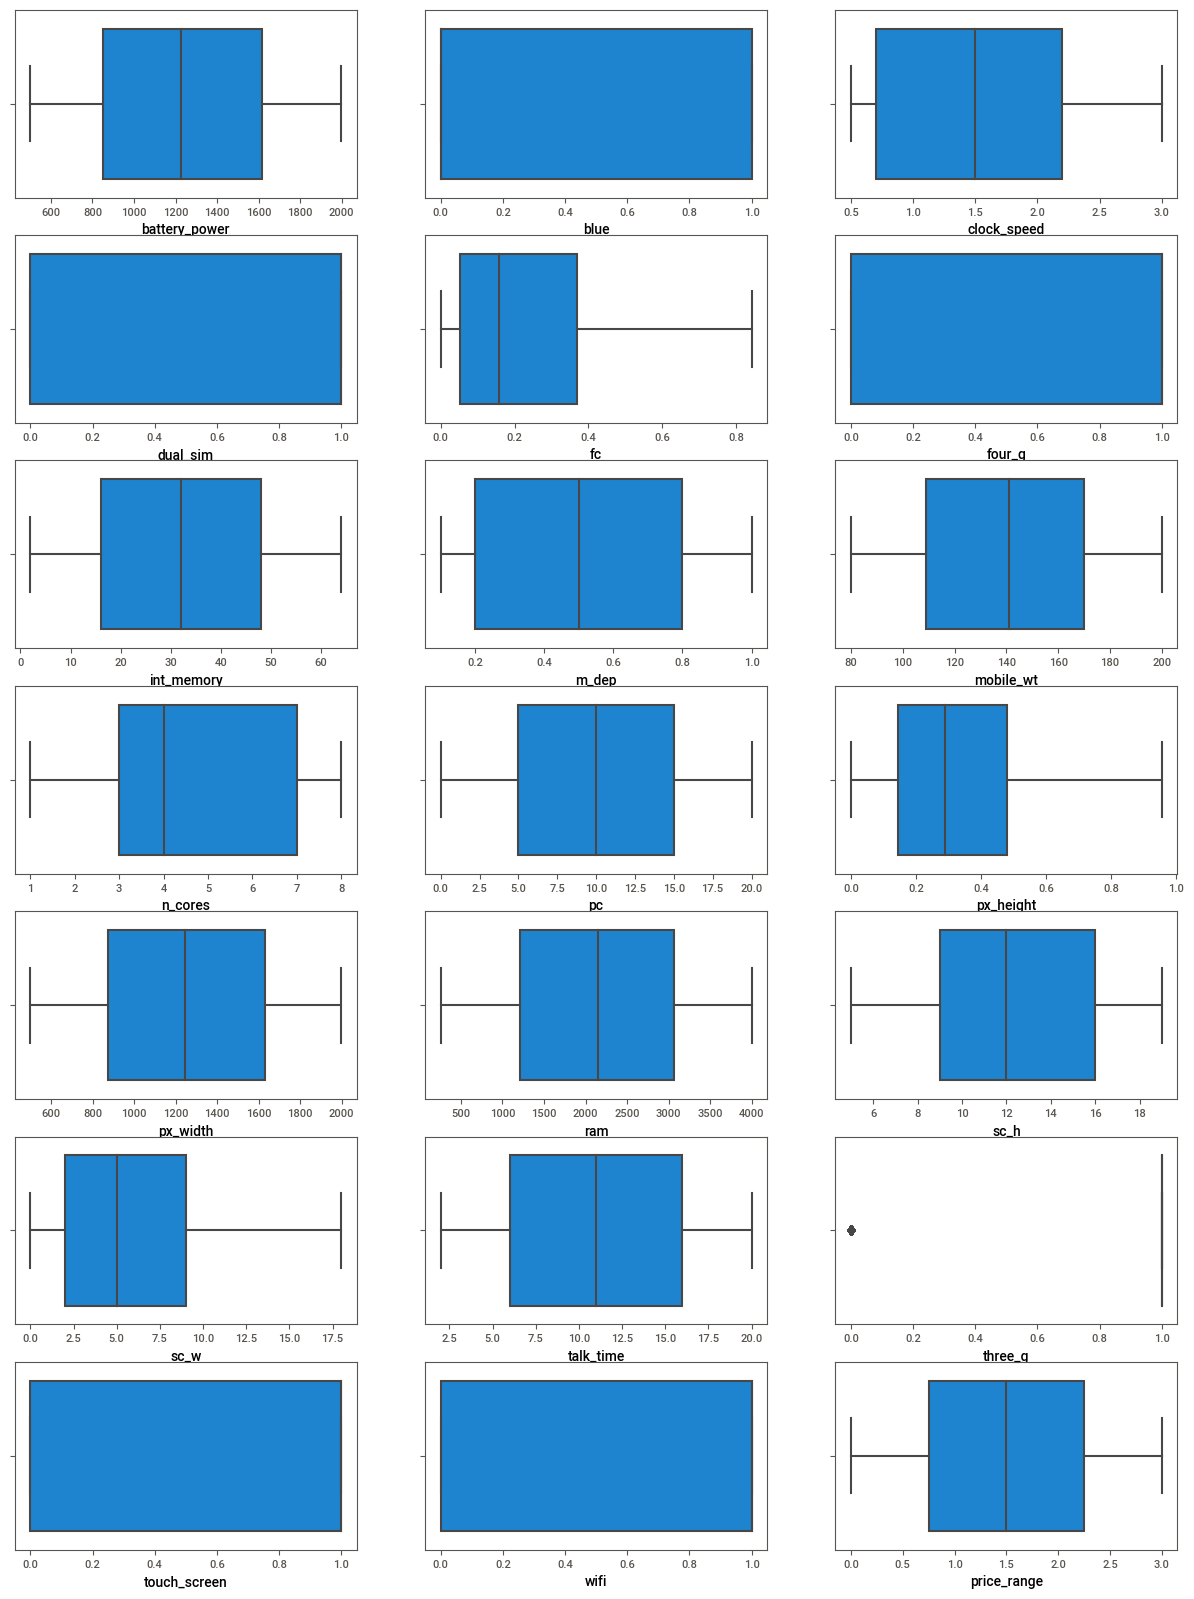

In [22]:
plt.figure(figsize=(15,20))
plotnumber = 1
for i in df:
    plt.subplot(7,3,plotnumber)
    sns.boxplot(x=i,data=df)
    plotnumber+=1

In [23]:
#outliers removed

# Feature Engineering

In [24]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.018896,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.013201,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003560,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.007277,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.006880,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.008716,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.033595,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.017889,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.018896,0.003560,-0.006880,-0.033595,1.000000,-0.019929,-0.025671,0.004464,0.013453,-0.001489,...,-0.031304,-0.014033,0.019830,0.000701,-0.002200,-0.008712,-0.003838,-0.025563,0.010491,0.020479
four_g,0.015665,0.013443,-0.043073,0.003187,-0.019929,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.025241,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.025671,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.011509,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,0.004464,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.021425,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.013453,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.005680,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.001489,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.009617,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

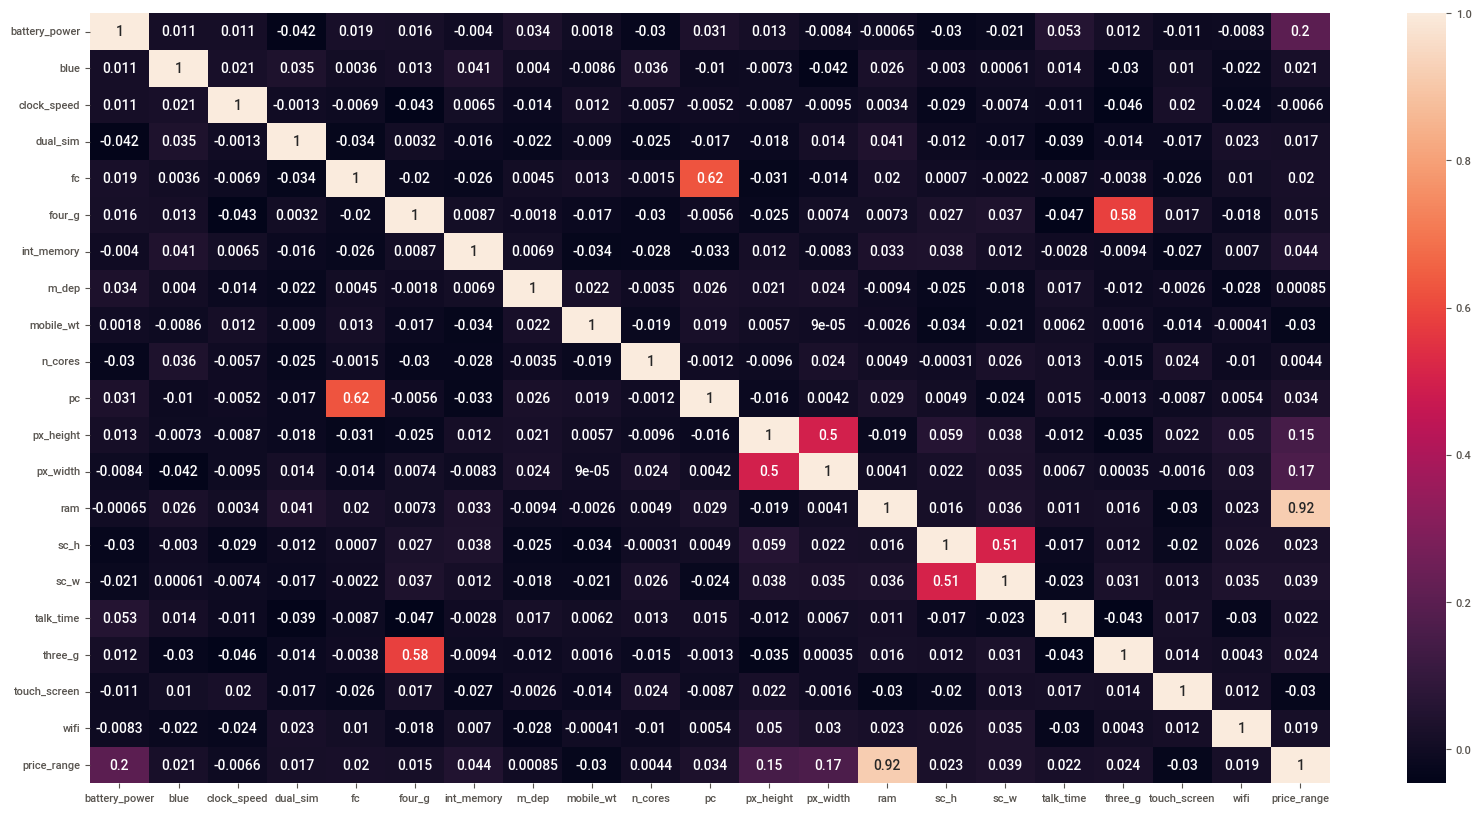

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [26]:
#There is maximum point of correlation in the price_range and ram around (0.92 points)

# Train Test Split

In [27]:
x= df.iloc[:,:-1]

In [28]:
y=df.price_range

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1600, 20), (400, 20), (1600,), (400,))

# Model creation

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel=LogisticRegression()
logmodel.fit(xtrain,ytrain)
pred=logmodel.predict(xtest)

In [34]:
ypred=logmodel.predict(xtest)
ypred

array([0, 2, 0, 3, 1, 2, 3, 0, 3, 3, 0, 1, 2, 3, 3, 2, 2, 3, 1, 0, 0, 1,
       0, 2, 1, 1, 3, 3, 3, 0, 1, 0, 3, 1, 2, 3, 2, 1, 3, 0, 1, 2, 3, 0,
       3, 3, 3, 1, 3, 1, 3, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 3, 3, 2, 2, 0,
       3, 3, 1, 1, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 3, 3,
       3, 0, 3, 3, 3, 0, 3, 2, 2, 3, 2, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1,
       0, 0, 3, 1, 2, 1, 3, 3, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 1,
       2, 3, 0, 2, 1, 1, 0, 2, 3, 1, 3, 3, 0, 0, 1, 2, 1, 2, 3, 1, 1, 0,
       2, 3, 0, 1, 0, 1, 3, 3, 1, 2, 1, 0, 0, 2, 1, 3, 2, 1, 0, 0, 3, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       2, 1, 1, 2, 1, 2, 3, 3, 1, 3, 0, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 0,
       3, 1, 3, 0, 0, 3, 1, 2, 0, 0, 1, 0, 2, 3, 2, 1, 0, 2, 3, 1, 3, 3,
       2, 3, 0, 3, 2, 2, 2, 3, 3, 1, 1, 3, 2, 0, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 2, 3, 0, 3, 3, 2, 2, 2, 0, 1, 3, 0, 2, 3, 1, 3, 1, 0, 2, 0, 3,
       0, 0, 3, 0, 2, 2, 3, 2, 2, 0, 1, 0, 0, 3, 3,

# Model Evolution

In [35]:
from sklearn.metrics import classification_report

In [36]:
pd.crosstab(ytest,ypred)

col_0,0,1,2,3
price_range,,,,
0,80,24,1,0
1,19,46,16,10
2,0,17,45,30
3,0,2,26,84


In [37]:
print (classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       105
           1       0.52      0.51      0.51        91
           2       0.51      0.49      0.50        92
           3       0.68      0.75      0.71       112

    accuracy                           0.64       400
   macro avg       0.63      0.63      0.63       400
weighted avg       0.64      0.64      0.64       400



In [38]:
from sklearn.svm import SVC

In [39]:
svcmodel=SVC()
svcmodel.fit(xtrain,ytrain)

SVC()

In [40]:
ypred=svcmodel.predict(xtest)

In [41]:
print (classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.86      0.91      0.89        91
           2       0.82      0.85      0.83        92
           3       0.95      0.89      0.92       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



In [42]:
#Decision Tree Classifier

In [43]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
xtrain_sm,ytrain_sm=smote.fit_resample(xtrain,ytrain)

In [44]:
from collections import Counter
print("before SMOTE:",Counter(ytrain))
print("After SMOTE:",Counter(ytrain_sm))

before SMOTE: Counter({1: 409, 2: 408, 0: 395, 3: 388})
After SMOTE: Counter({1: 409, 2: 409, 0: 409, 3: 409})


In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)
dt.fit(xtrain_sm,ytrain_sm)

DecisionTreeClassifier(random_state=10)

In [46]:
ypred=dt.predict(xtest)

In [47]:
print (classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       105
           1       0.72      0.84      0.77        91
           2       0.75      0.68      0.72        92
           3       0.89      0.91      0.90       112

    accuracy                           0.83       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.84      0.83      0.83       400



In [63]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":("gini","entropy"),
          "splitter":("best", "random"),
          "max_depth":(list(range(1,20))),
          "min_samples_split":[2,3,4],
          "min_samples_leaf":list(range(1,20))}

In [64]:
tree_clf = DecisionTreeClassifier(random_state=10)
tree_cv = GridSearchCV(tree_clf,params,scoring="f1_weighted",n_jobs= -1,verbose=2,cv=3)

In [65]:
tree_cv.fit(x,y)
tree_cv.best_params_

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [66]:
df = DecisionTreeClassifier(criterion="gini",
                            max_depth=3,min_samples_leaf=1,min_samples_split=2,
                            splitter='best',random_state=10)
df.fit(xtrain_sm,ytrain_sm)
ypred=dt.predict(xtest)
print(classification_report(ytest,ypred))
pd.crosstab(ytest,ypred)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       105
           1       0.76      0.80      0.78        91
           2       0.74      0.68      0.71        92
           3       0.86      0.92      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



col_0,0,1,2,3
price_range,,,,
0,94,11,0,0
1,5,73,13,0
2,0,12,63,17
3,0,0,9,103


In [67]:
#Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf=RandomForestClassifier(n_estimators=10,random_state=1) 
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       105
           1       0.73      0.79      0.76        91
           2       0.67      0.67      0.67        92
           3       0.89      0.81      0.85       112

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



In [70]:
#Random Forest - Hyperparameter tuning
params = {
          "n_estimators":[5,10,20,40,80,120,200,400,750,1000],
          "criterion":("gini","entropy"),
          "max_depth":(list(range(2,20))),
          "min_samples_split":[2,3,4,5,6,7,8,9],
          "min_samples_leaf":[2,3,4,5,6,7,8,9],
          "max_features":["sqrt","log2"],
          "bootstrap":[True,False]
}

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
rf1= RandomForestClassifier(random_state=1,n_jobs=-1)
randomcv=RandomizedSearchCV(estimator=rf1,param_distributions=params,
                          cv=3, refit=True,verbose=2,scoring="f1_weighted",
                           n_iter=200,random_state=10,n_jobs=-1)

In [73]:
randomcv.fit(x, y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ('gini', 'entropy'),
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [5, 10, 20, 40, 80, 120,
                                                         200, 400, 750, 1000]},
                   random_state=10, scoring='f1_weighted', verbose=2)

In [74]:
randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'criterion': 'entropy',
 'bootstrap': False}

In [75]:
rf1= RandomForestClassifier(random_state=1,n_jobs=-1)
randomcv=RandomizedSearchCV(estimator=rf1,param_distributions=params,
                          cv=3, refit=True,verbose=2,scoring="f1_weighted",
                           n_iter=200,random_state=10,n_jobs=-1)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       105
           1       0.73      0.79      0.76        91
           2       0.67      0.67      0.67        92
           3       0.89      0.81      0.85       112

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



In [76]:
#Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
pred=gb.predict(xtest)

In [78]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.88      0.90      0.89        91
           2       0.82      0.86      0.84        92
           3       0.93      0.89      0.91       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [79]:
pd.crosstab(ytest,pred)

col_0,0,1,2,3
price_range,,,,
0,99,6,0,0
1,4,82,5,0
2,0,5,79,8
3,0,0,12,100
